In [1]:
import pandas as pd
from mplsoccer import Radar, FontManager, grid
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [6]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#202020"
filler = "#FFFF50"
primary = "#FF6666"

In [2]:
#Creating random data
lower, upper, mu, sigma = 0, 1, 0.35, 0.25
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
# for 1000 people and 11 skills
values = X.rvs((1000, 11))
# the names of the skills
params = ['Expected goals', 'Total shots',
          'Touches in attacking penalty area', 'Pass completion %',
          'Crosses into the 18-yard box (excluding set pieces)',
          'Expected goals assisted', 'Fouls drawn', 'Successful dribbles',
          'Successful pressures', 'Non-penalty expected goals per shot',
          'Miscontrols/ Dispossessed']
# set up a dataframe with the random values
df = pd.DataFrame(values)
df.columns = params
# in real-life you'd probably have a string column for the player name,
# but we will use numbers here
df['player_name'] = np.arange(1000)

In [3]:
# create the radar object with an upper and lower bound of the 5% and 95% quantiles
low = df[params].quantile(0.05).values
high = df[params].quantile(0.95).values
lower_is_better = ['Miscontrols/ Dispossessed']
radar = Radar(params, low, high, lower_is_better=lower_is_better, num_rings=4)

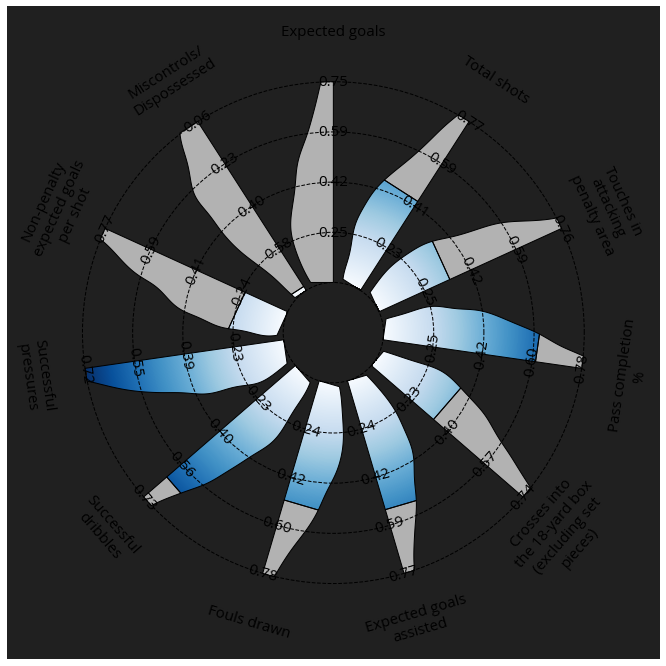

In [10]:
# get the player's values (usually the 23 would be a string)
# so for example you might put
# df.loc[df.player_name == 'Martin Ødegaard', params].values[0].tolist()
player_values = df.loc[df.player_name == 23, params].values[0]

# plot the turbine plot
fig, ax = radar.setup_axis(facecolor=background)  # format axis as a radar
# plot the turbine blades. Here we give the player_Values and the
# value for all players shape=(1000, 11)
turbine_output = radar.turbine(player_values, df[params].values, ax=ax,
                               kwargs_inner={'edgecolor': 'black'},
                               kwargs_inner_gradient={'cmap': 'Blues'},
                               kwargs_outer={'facecolor': '#b2b2b2', 'edgecolor': 'black'})
# plot some dashed rings and the labels for the values and parameter names
rings_inner = radar.draw_circles(ax=ax, facecolor='None', edgecolor='black', linestyle='--')
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, fontproperties=body_font, zorder=2)
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=body_font, zorder=2)

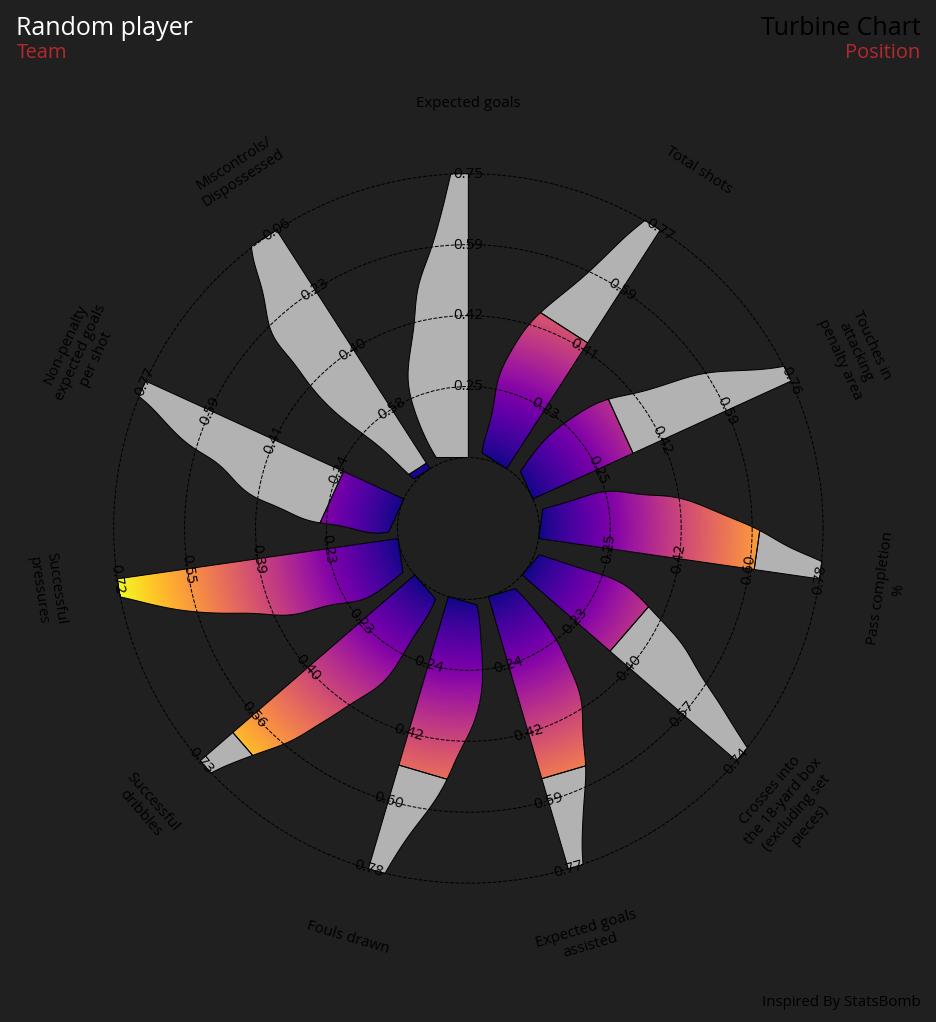

In [14]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)
fig.set_facecolor(background)

# plot the turbine plot
radar.setup_axis(ax=axs['radar'], facecolor=background)
# plot the turbine blades. Here we give the player_Values and
# the value for all players shape=(1000, 11)
turbine_output = radar.turbine(player_values, df[params].values, ax=axs['radar'],
                               kwargs_inner={'edgecolor': 'black'},
                               kwargs_inner_gradient={'cmap': 'plasma'},
                               kwargs_outer={'facecolor': '#b2b2b2', 'edgecolor': 'black'})
# plot some dashed rings and the labels for the values and parameter names
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='None',
                                 edgecolor='black', linestyle='--')
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=body_font, zorder=2)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=body_font, zorder=2)

# adding a title and endnote
title1_text = axs['title'].text(0.01, 0.65, 'Random player', fontsize=25,
                                fontproperties=body_font, ha='left', va='center', color="white")
title2_text = axs['title'].text(0.01, 0.25, 'Team', fontsize=20,
                                fontproperties=body_font,
                                ha='left', va='center', color='#B6282F')
title3_text = axs['title'].text(0.99, 0.65, 'Turbine Chart', fontsize=25,
                                fontproperties=body_font, ha='right', va='center', color="white")
title4_text = axs['title'].text(0.99, 0.25, 'Position', fontsize=20,
                                fontproperties=body_font,
                                ha='right', va='center', color='#B6282F')
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By StatsBomb', fontsize=15,
                                   fontproperties=body_font, ha='right', va='center')